In [ ]:
# Importing Required Packages
import numpy as np
from numpy.random import rand,randn
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
# n : number of samples
# type : real / fake
def get_real_samples(n):
    X1 = rand(n)-0.5
    X2=X1*X1
    X1=X1.reshape(n,1)
    X2=X2.reshape(n,1)
    X=np.hstack((X1,X2))
    y=np.ones((n,1))
    return X,y

In [ ]:
# This function generates fake points with help of generator
def get_fake_samples(gen,noise_dim,n):
    #generating random points from latent space
    x_input = noise_points(noise_dim,n)
    # X is the output from the generator
    X = gen.predict(x_input)
    # Since these are fake samples so y=0
    y=np.zeros((n,1))
    return X,y

In [ ]:
# Make discriminator model (classifies real/fake inputs)
def disc_model(input_dim=2):
    model=Sequential()
    #hidden layer
    model.add(Dense(25,activation='relu',input_dim=input_dim))
    #outputlayer
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [ ]:
# Make generator model (generates fake inputs)
def gen_model(input_dim,output_dim=2):
    model=Sequential()
    model.add(Dense(15,activation='relu',input_dim=input_dim))
    model.add(Dense(output_dim,activation='linear'))
    return model

In [ ]:
# Logical model for connecting generator and discriminator
def gan_model(disc,gen):
    disc.trainable=False
    model=Sequential()
    model.add(gen)
    model.add(disc)
    model.compile(loss='binary_crossentropy',optimizer='adam')
    return model

In [ ]:
# generate noise points from latent space (latent variables)
def noise_points(noise_dim,n):
    noise = randn(n*noise_dim)
    noise=noise.reshape(n,noise_dim)
    return noise

In [ ]:
# Model evaluation function
def show_performance(epoch,g_model,d_model,noise_dim,n=100):
    x_real,y_real = get_real_samples(n)
    _,real_acc = d_model.evaluate(x_real,y_real,verbose=0)
    x_fake,y_fake = get_fake_samples(g_model,noise_dim,n)
    _,fake_acc = d_model.evaluate(x_fake,y_fake,verbose=0)
    print(epoch,real_acc,fake_acc)
    plt.figure(figsize=(20,10))
    plt.scatter(x_real[:,0],x_real[:,1],color='red')
    plt.scatter(x_fake[:,0],x_fake[:,1],color='blue')

In [ ]:
def train(g_model,d_model,gan_model,noise_dim,epochs=10000,batch_size=256,n_eval=2000):
    half_batch=batch_size//2
    for i in range(epochs):
        x_real,y_real = get_real_samples(half_batch)
        x_fake,y_fake = get_fake_samples(g_model,noise_dim,half_batch)
        d_model.train_on_batch(x_real,y_real)
        d_model.train_on_batch(x_fake,y_fake)
        x_gan = noise_points(noise_dim,batch_size)
        y = np.ones((batch_size,1))
        gan_model.train_on_batch(x_gan,y)
        if (i+1) % n_eval ==0:
            show_performance(i+1,g_model,d_model,noise_dim)

2000 0.5400000214576721 1.0
4000 0.550000011920929 1.0
6000 0.41999998688697815 0.5899999737739563
8000 0.4099999964237213 0.5400000214576721
10000 0.9200000166893005 0.20999999344348907


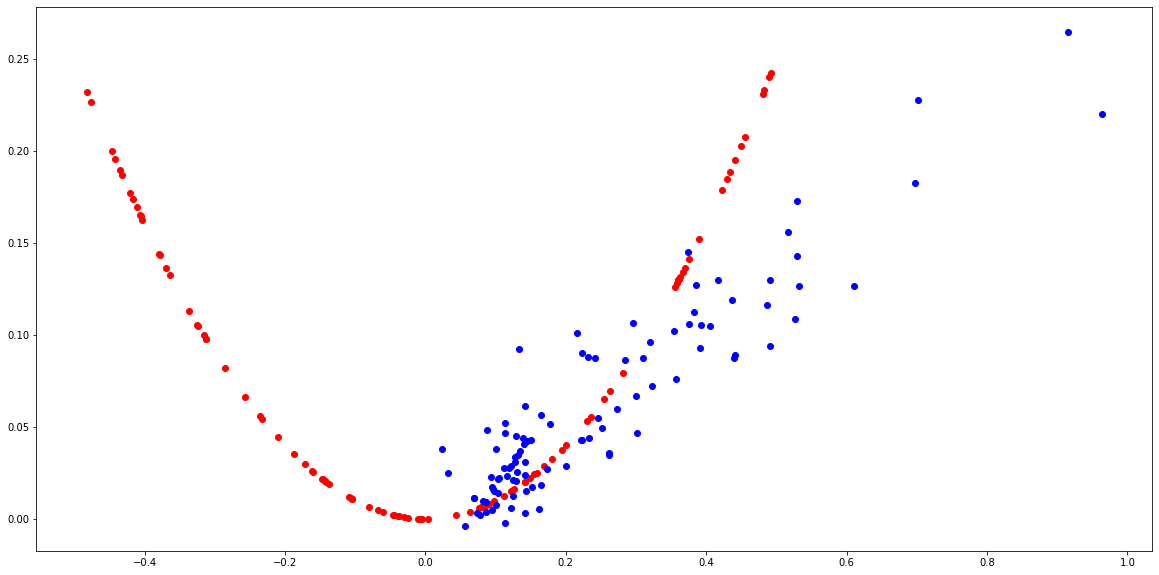

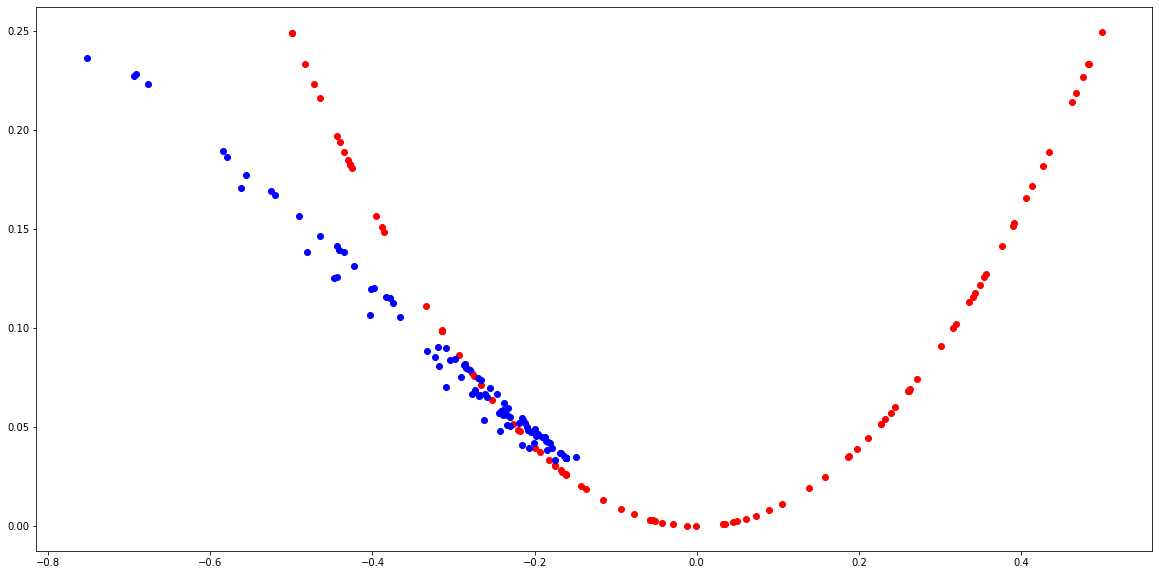

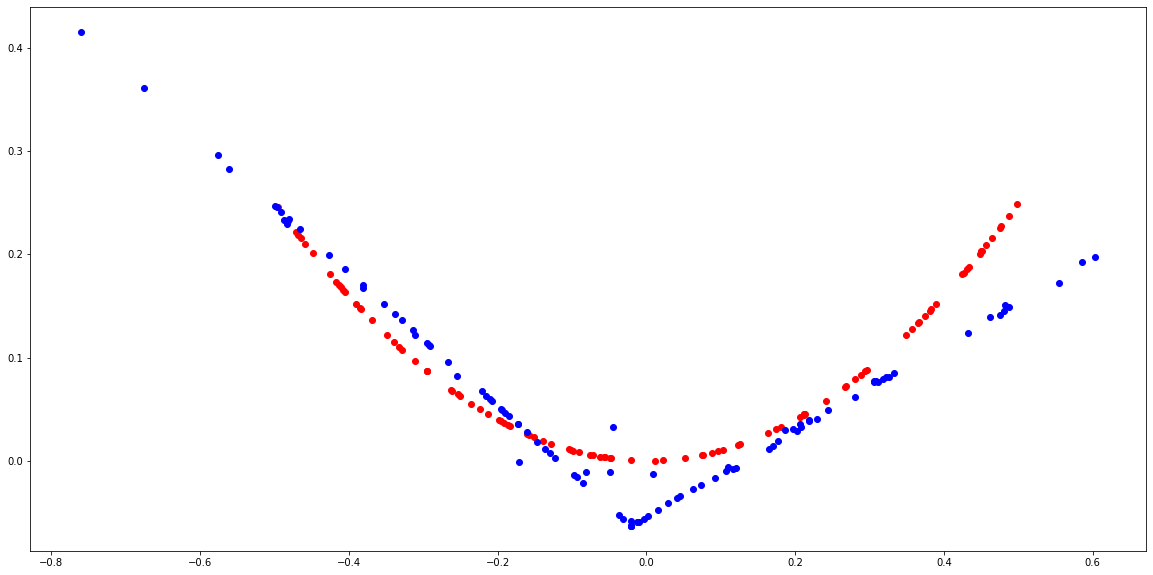

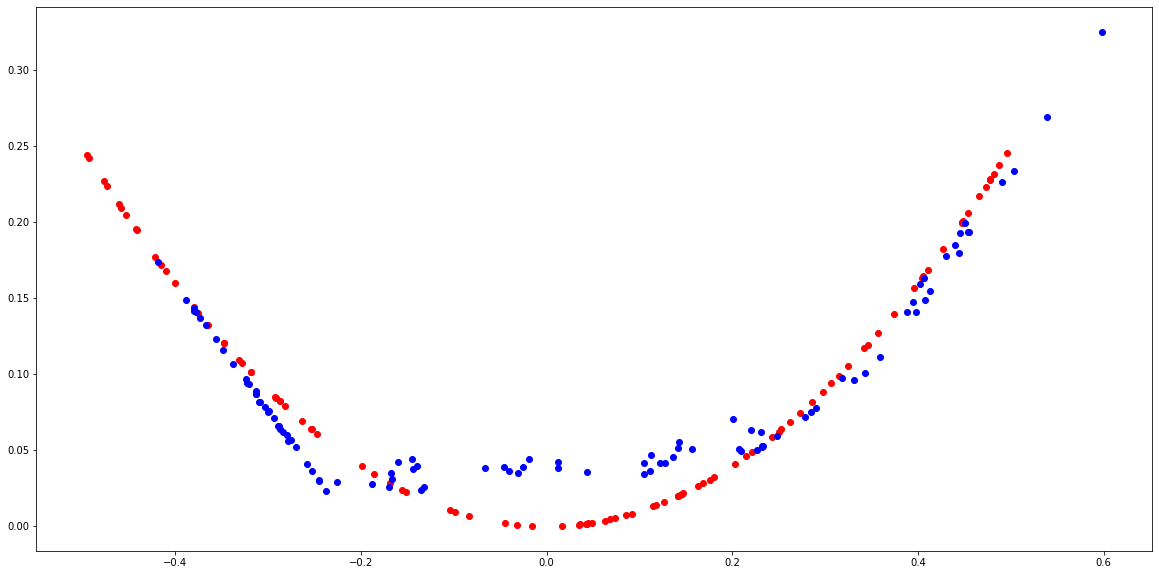

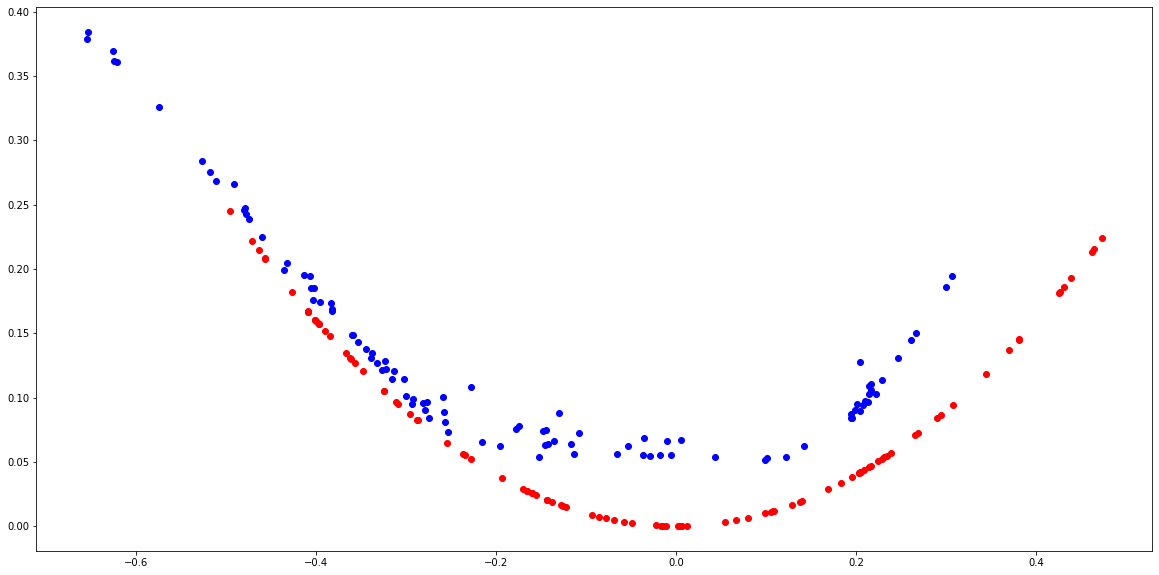

In [ ]:
noise_dim=5
gen = gen_model(noise_dim)
disc = disc_model()
gan = gan_model(disc,gen)
train(gen,disc,gan,noise_dim)